# PySpark Set-Up:

In [1]:
!pip install pyspark

# This was actually the earliest problem in the code that I ran into. I tried to keep with the original link that was given to us. However, this did not work. I changed this very late in the code, on the 17th. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=3589a65fca44b4b70b75be3beb820749f3c9bae6957688767507aabf7f114177
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
import pyspark
from pyspark import SparkConf, SparkContext

# Importing libraries as necessary.

In [3]:
conf = SparkConf().setAppName("MySparkApp").setMaster("local[*]")

# Standard spark setup.

In [4]:
sc = SparkContext(conf=conf)

# Standard spark setup.

In [5]:
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)
result = rdd.map(lambda x: x * 2).collect()
print(result)  

# Testing the RDD, this will be useful for the display methods later.

[2, 4, 6, 8, 10]


# Extraction of Dataset:

This dataset is a Yelp dataset, one which displays data for Yelp across the states in America and Canada. This is the extraction and further set-up of this code.

In [6]:
from pyspark.sql import SparkSession

!pip install findspark

# In order to use the sc, this is a preliminary step.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import findspark
findspark.init()

# Initialisation of findspark. This is necessary for PySpark.

In [8]:
spark = SparkSession(sc)
# Setup of spark context. This allows everything from spark to be called on using the "spark." command. As shown below.

# First dataframe. This is the Yelp dataset, unchanged from the download and upload. 
df = spark.read.json("/content/drive/MyDrive/Semester III/Data Operations and Management/Class Work/CA 2/yelp_academic_dataset_business.json")

# The cleaning stage below 
df = df.drop('address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'postal_code')
df.show()

+-------------+--------------+--------------------+------------+-----+-----+
|     latitude|     longitude|                name|review_count|stars|state|
+-------------+--------------+--------------------+------------+-----+-----+
|   34.4266787|  -119.7111968|Abby Rappoport, L...|           7|  5.0|   CA|
|    38.551126|    -90.335695|       The UPS Store|          15|  3.0|   MO|
|    32.223236|   -110.880452|              Target|          22|  3.5|   AZ|
|   39.9555052|   -75.1555641|  St Honore Pastries|          80|  4.0|   PA|
|   40.3381827|   -75.4716585|Perkiomen Valley ...|          13|  4.5|   PA|
|    36.269593|    -87.058943|      Sonic Drive-In|           6|  2.0|   TN|
|    38.627695|    -90.340465|     Famous Footwear|          13|  2.5|   MO|
|     27.76659|    -82.732983|      Temple Beth-El|           5|  3.5|   FL|
|   38.5651648|   -90.3210868|Tsevi's Pub And G...|          19|  3.0|   MO|
|   36.2081024|   -86.7681696|      Sonic Drive-In|          10|  1.5|   TN|

In [9]:
distinctdf = df.distinct()
print("Distinct count:", distinctdf.count(), "Standard count:", df.count())
if df.count() == distinctdf.count():
  print('No duplicate rows present!')

distinctdf.show(truncate=False)

Distinct count: 150346 Standard count: 150346
No duplicate rows present!
+-------------+--------------+---------------------------------------+------------+-----+-----+
|latitude     |longitude     |name                                   |review_count|stars|state|
+-------------+--------------+---------------------------------------+------------+-----+-----+
|40.00687     |-75.217262    |Bala Better Health                     |13          |4.0  |PA   |
|28.3326007   |-82.6681066   |Publix Super Market                    |7           |3.5  |FL   |
|39.9535919923|-75.1794226902|Bistro St. Tropez                      |163         |3.5  |PA   |
|28.130283    |-82.364992    |The Humming Bird Jerk house            |32          |3.5  |FL   |
|35.9086461   |-86.8813826   |Coleman Taylor Transmissions           |8           |5.0  |TN   |
|40.0419916   |-75.5183654   |J.M. Grove Construction & Supply       |12          |1.5  |PA   |
|32.236481    |-110.869794   |Divinity Beauty Bar              

# Transformation of Dataset - Dataframe Transformations:
This dataset will be used to analyse the reviews and ratings per state. In particular, what is the performance per each location?
- Calculate the average rating per state. 
- Calculate the total number of reviews per state.

In [10]:
from pyspark.sql.functions import mean, round, sum

# In order to calculate the average and the total reviews, these will be necessary functions to call on.

In [11]:
# In order to not completely modify the dataset, these were ordered in parts 1 through 4.
# This is df_part_1 

# The average stars per state were calculated here, by grouping the data by state, and aggregating the stars per state. 
  # The mean value of this aggregation is also calculated, and rounded to 2. 
  # For readability, this column is given a new name: "average_stars"

df_part_1 = df.groupBy("state").agg((round(mean("stars"), 2)).alias("average_stars"))
df_part_1.show(60)

+-----+-------------+
|state|average_stars|
+-----+-------------+
|   AZ|         3.59|
|   LA|         3.68|
|   NJ|         3.46|
|   MI|          2.5|
|   NV|         3.74|
|   ID|         3.71|
|   CA|          4.0|
|   MT|          5.0|
|   NC|          2.0|
|   DE|         3.35|
|   MO|         3.55|
|   IL|         3.37|
|   WA|          3.5|
|   IN|         3.59|
|   TN|         3.57|
|   PA|         3.57|
|   AB|         3.45|
|   TX|         2.88|
|   FL|         3.61|
|   CO|          4.0|
|   UT|          4.5|
|   HI|         4.25|
|   VT|          4.5|
|   VI|          2.5|
|  XMS|          4.0|
|   SD|          4.5|
|   MA|         1.25|
+-----+-------------+



In [12]:
# df_part_2

# First, grouping the dataframe by the state, then aggregating the sum of the reviews per state. 
  # For readability, this is named "total_reviews". This is shown below.

df_part_2 = df.groupBy("state").agg(sum("review_count").alias("total_reviews"))
df_part_2.show(50)

# As shown in many of these, there are numerous reviews in states which have only single or double digit review counts. 
# Other states have many more.

+-----+-------------+
|state|total_reviews|
+-----+-------------+
|   AZ|       412639|
|   LA|       743176|
|   NJ|       249837|
|   MI|            9|
|   NV|       409950|
|   ID|       152086|
|   CA|       339637|
|   MT|            6|
|   NC|           29|
|   DE|        67370|
|   MO|       483897|
|   IL|        49676|
|   WA|           19|
|   IN|       472565|
|   TN|       598195|
|   PA|      1540790|
|   AB|       105477|
|   TX|           33|
|   FL|      1119926|
|   CO|           30|
|   UT|           19|
|   HI|           32|
|   VT|           10|
|   VI|           10|
|  XMS|            5|
|   SD|           42|
|   MA|           43|
+-----+-------------+



# Data Integration:
This stage combines the two dataframes which were created in this process, using a join function.

In [13]:
# In order to combine these two dataframes, a join is performed on df_part_1 and df_part_2, by state. This is an inner join. 
  # This is said to be a summary dataframe.

summary_dataframe = df_part_1.join(df_part_2, "state", "inner")

summary_dataframe.show(50)

+-----+-------------+-------------+
|state|average_stars|total_reviews|
+-----+-------------+-------------+
|   AZ|         3.59|       412639|
|   LA|         3.68|       743176|
|   NJ|         3.46|       249837|
|   MI|          2.5|            9|
|   NV|         3.74|       409950|
|   ID|         3.71|       152086|
|   CA|          4.0|       339637|
|   MT|          5.0|            6|
|   NC|          2.0|           29|
|   DE|         3.35|        67370|
|   MO|         3.55|       483897|
|   IL|         3.37|        49676|
|   WA|          3.5|           19|
|   IN|         3.59|       472565|
|   TN|         3.57|       598195|
|   PA|         3.57|      1540790|
|   AB|         3.45|       105477|
|   TX|         2.88|           33|
|   FL|         3.61|      1119926|
|   CO|          4.0|           30|
|   UT|          4.5|           19|
|   HI|         4.25|           32|
|   VT|          4.5|           10|
|   VI|          2.5|           10|
|  XMS|          4.0|       

# Transformation of Dataset - Pie Chart of Total Reviews by State:

In order to represent the Total Reviews per State proportionally, a pie chart is a very good visual indicator and an excellent transformation to make.

In [14]:
import matplotlib.pyplot as plt
# PySpark does not seem to have any method to display its own plots. 
  # So in this case, plt will be imported. 

# As shown below, average stars is dropped to streamline a temporary dataframe. 
  # This was also ordered by total reviews in descending order. 
  # As a result, one may already get insight into where Yelp performs the best.
  # PA - Pennsylvania. 
  # FL - Florida
  # LA - Louisiana.

  # This also starts to display the first necessary data cleaning steps. "XMS" is not a state, but the one location corellates to a business in Michigan. 

reviews_by_state = summary_dataframe.drop("average_stars")
reviews_by_state = reviews_by_state.sort(reviews_by_state.total_reviews.desc())

reviews_by_state.show(60)

+-----+-------------+
|state|total_reviews|
+-----+-------------+
|   PA|      1540790|
|   FL|      1119926|
|   LA|       743176|
|   TN|       598195|
|   MO|       483897|
|   IN|       472565|
|   AZ|       412639|
|   NV|       409950|
|   CA|       339637|
|   NJ|       249837|
|   ID|       152086|
|   AB|       105477|
|   DE|        67370|
|   IL|        49676|
|   MA|           43|
|   SD|           42|
|   TX|           33|
|   HI|           32|
|   CO|           30|
|   NC|           29|
|   WA|           19|
|   UT|           19|
|   VT|           10|
|   VI|           10|
|   MI|            9|
|   MT|            6|
|  XMS|            5|
+-----+-------------+



In [15]:
# In a pie chart, the 13 lowest states can be combined.
  # This is to not crowd the pie-chart.
  # In this case, the reviews_by_state_under_50 will serve as a record of these states.

reviews_by_state_under_50 = reviews_by_state[reviews_by_state['total_reviews'] < 50]

In [16]:
# Removing these Yelp reviews from the original reviews_by_state dataset will allow for a pie chart to be made using this.
  # Both dataframes are shown here.

reviews_by_state = reviews_by_state.filter(reviews_by_state["total_reviews"] > 50)
reviews_by_state.show()
reviews_by_state_under_50.show()

# Note that rerunning this block after proceeding blocks will insert the combined small states. 

+-----+-------------+
|state|total_reviews|
+-----+-------------+
|   PA|      1540790|
|   FL|      1119926|
|   LA|       743176|
|   TN|       598195|
|   MO|       483897|
|   IN|       472565|
|   AZ|       412639|
|   NV|       409950|
|   CA|       339637|
|   NJ|       249837|
|   ID|       152086|
|   AB|       105477|
|   DE|        67370|
|   IL|        49676|
+-----+-------------+

+-----+-------------+
|state|total_reviews|
+-----+-------------+
|   MA|           43|
|   SD|           42|
|   TX|           33|
|   HI|           32|
|   CO|           30|
|   NC|           29|
|   WA|           19|
|   UT|           19|
|   VT|           10|
|   VI|           10|
|   MI|            9|
|   MT|            6|
|  XMS|            5|
+-----+-------------+



In [17]:
# This is the first use of RDD.flatmap in ordered to create a list of reviews in the under_50 dataset. 

# Collection:
list_yelp_reviews = reviews_by_state_under_50.select('total_reviews').rdd.flatMap(lambda x: x).collect()

# Setting sum_list_yelp_reviews as 0 is necessary to re-running this block. Resets counter.
sum_list_yelp_reviews = 0

for number in list_yelp_reviews:
    sum_list_yelp_reviews += number
sum_list_yelp_reviews

# This returns a number of yelp reviews from the states yelp is not successful in.

287

In [18]:
from pyspark.sql import Row
# In order to combine these and add them to the total yelp reviews, it is necessary to import row. This is inserted into a temporary dataframe.

temp_df = spark.createDataFrame([
    Row(state='MA, SD, TX, HI, CO, NC, WA, UT, VT, VI, MI and MT.', total_reviews=sum_list_yelp_reviews)]) # This is the labelling of the states of the reviews, as well as inserting the number calculated above. 
temp_df.show()
# To verify that this is working, always best to show the temporary dataframe.

+--------------------+-------------+
|               state|total_reviews|
+--------------------+-------------+
|MA, SD, TX, HI, C...|          287|
+--------------------+-------------+



In [19]:
# After that temporary dataframe is made, join the two of them using .union()

reviews_by_state = reviews_by_state.union(temp_df)
reviews_by_state.show()

# Only run this once. Else, multiple temp_df instances will be added to the dataframe.

+--------------------+-------------+
|               state|total_reviews|
+--------------------+-------------+
|                  PA|      1540790|
|                  FL|      1119926|
|                  LA|       743176|
|                  TN|       598195|
|                  MO|       483897|
|                  IN|       472565|
|                  AZ|       412639|
|                  NV|       409950|
|                  CA|       339637|
|                  NJ|       249837|
|                  ID|       152086|
|                  AB|       105477|
|                  DE|        67370|
|                  IL|        49676|
|MA, SD, TX, HI, C...|          287|
+--------------------+-------------+



In [20]:
# In order to use plt.pie, a list must be used. It does not seem to run from iterating through the dataframe in pyspark.
  # Therefore, must convert both of these into a list.
  # Because these were ordered earlier, the pie chart will also be ordered! 
    # This also uses RDD to create a list of words, which can be inserted into the pie chart.
    # The RDD also calculates the reviews as a percentage.

state_list = reviews_by_state.select('state').rdd.flatMap(lambda x: x).collect()
reviews_list = reviews_by_state.select('total_reviews').rdd.flatMap(lambda x: x).collect()

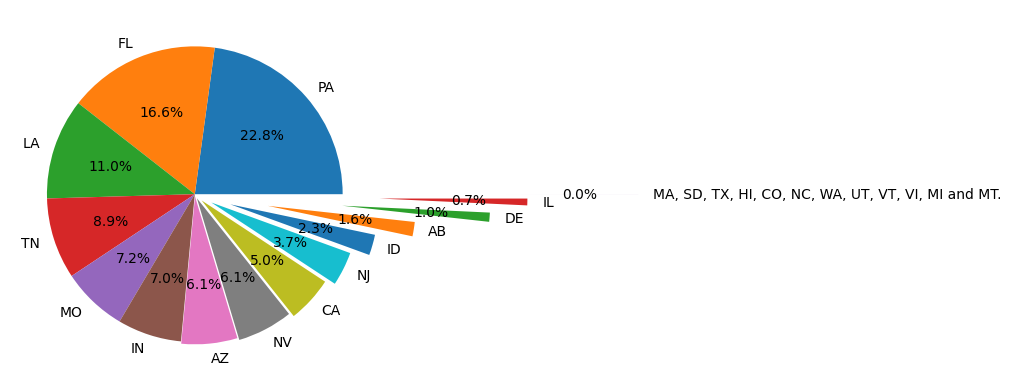

In [21]:
# This will allow the distance to be plotted regarding the pie chart.
my_explode = [0,0,0,0,0,0,0.0155125,0.03125,0.0625,0.125,0.25,0.5,1,1.25,2]

# The reviews_list is calculated as a percentage. 
# Explode plots the distance from the centre, per slice of pie.
# The labels is taken from the state_list.

# This all creates a summary as shown below.
plt.pie(reviews_list, explode =my_explode, labels=state_list, autopct='%1.1f%%')
plt.show()


# Note that the combined states with less than 50 reviews per state make up a negligable percentage of the chart. 
  # The insight to be gained from here is that Yelp as a company might see value in expanding to these locations.

# Transformation of Dataset - Bar Chart Star Average by State:

To represent the Star Average per State, a similar process to the Pie Chart will be carried out.

In [22]:
# To refresh this (or in the case that the examiner skipped the pie chart), the summary dataset is shown again, below.

summary_dataframe.show(40)

# There is a problem with the stars. The results are skewed by the averages with fewer reviews. These are higher and lower simultaneously.
# This means that a more detailed analysis can be performed with two datasets.

+-----+-------------+-------------+
|state|average_stars|total_reviews|
+-----+-------------+-------------+
|   AZ|         3.59|       412639|
|   LA|         3.68|       743176|
|   NJ|         3.46|       249837|
|   MI|          2.5|            9|
|   NV|         3.74|       409950|
|   ID|         3.71|       152086|
|   CA|          4.0|       339637|
|   MT|          5.0|            6|
|   NC|          2.0|           29|
|   DE|         3.35|        67370|
|   MO|         3.55|       483897|
|   IL|         3.37|        49676|
|   WA|          3.5|           19|
|   IN|         3.59|       472565|
|   TN|         3.57|       598195|
|   PA|         3.57|      1540790|
|   AB|         3.45|       105477|
|   TX|         2.88|           33|
|   FL|         3.61|      1119926|
|   CO|          4.0|           30|
|   UT|          4.5|           19|
|   HI|         4.25|           32|
|   VT|          4.5|           10|
|   VI|          2.5|           10|
|  XMS|          4.0|       

In [23]:
# The values with abnormally low reviews are skewing the results. 
  # Therefore, it is a good cleaning method to filter these datasets out (though these can be kept and graded too.)
  # These are each shown below.

# This displays the normal results, with total_reviews under 50.
summary_dataframe_normal = summary_dataframe[summary_dataframe['total_reviews'] > 50]

# This displays the outlier results, with total_reviews under 50
summary_dataframe_outliers = summary_dataframe[summary_dataframe['total_reviews'] < 50]

# Both of these are shown in order.
summary_dataframe_normal.show()
summary_dataframe_outliers.show()


+-----+-------------+-------------+
|state|average_stars|total_reviews|
+-----+-------------+-------------+
|   AZ|         3.59|       412639|
|   LA|         3.68|       743176|
|   NJ|         3.46|       249837|
|   NV|         3.74|       409950|
|   ID|         3.71|       152086|
|   CA|          4.0|       339637|
|   DE|         3.35|        67370|
|   MO|         3.55|       483897|
|   IL|         3.37|        49676|
|   IN|         3.59|       472565|
|   TN|         3.57|       598195|
|   PA|         3.57|      1540790|
|   AB|         3.45|       105477|
|   FL|         3.61|      1119926|
+-----+-------------+-------------+

+-----+-------------+-------------+
|state|average_stars|total_reviews|
+-----+-------------+-------------+
|   MI|          2.5|            9|
|   MT|          5.0|            6|
|   NC|          2.0|           29|
|   WA|          3.5|           19|
|   TX|         2.88|           33|
|   CO|          4.0|           30|
|   UT|          4.5|      

In [24]:
# The following dataset is for the normal dataset.

# The average stars dataset is constructed below, by dropping the total reviews.
  # This is also ordered in ascending order. 

df_average_stars_normal = summary_dataframe_normal.drop("total_reviews")
df_average_stars_normal = df_average_stars_normal.sort(df_average_stars_normal.average_stars.asc())
df_average_stars_normal.show(50)

# As before, combine both of these into a list using the RDD flatmap function.
  # Plt.bar works with a list. Therefore, must convert both of these into a list.

state_list = df_average_stars_normal.select('state').rdd.flatMap(lambda x: x).collect()
stars_list = df_average_stars_normal.select('average_stars').rdd.flatMap(lambda x: x).collect()

# Also will need this to calculate averages.
import statistics

+-----+-------------+
|state|average_stars|
+-----+-------------+
|   DE|         3.35|
|   IL|         3.37|
|   AB|         3.45|
|   NJ|         3.46|
|   MO|         3.55|
|   TN|         3.57|
|   PA|         3.57|
|   AZ|         3.59|
|   IN|         3.59|
|   FL|         3.61|
|   LA|         3.68|
|   ID|         3.71|
|   NV|         3.74|
|   CA|          4.0|
+-----+-------------+



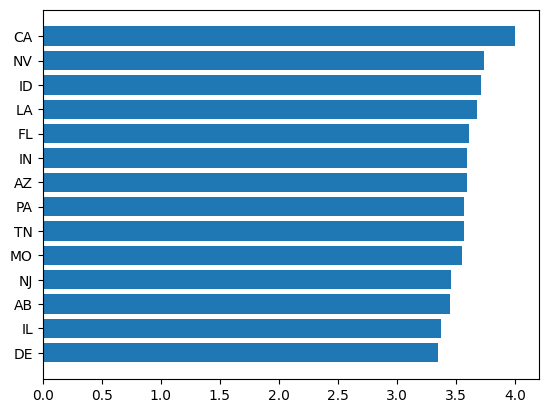

Average Stars:
 3.5885714285714285


In [25]:
# This bar chart is set as horizontal, using the lists of the states as labels, and the star values as the result. 
  # This shows a good display of how the businesses perform in each region. 

plt.barh(list(state_list), list(stars_list))
plt.show()

print('Average Stars:\n', 
      statistics.mean(list(stars_list))
)
# This dataset has 3.59 stars on average.

In [26]:
# As before, but now with the outlier dataset. These results should be expected to be more skewed, due to a lack of data.

df_average_stars_outliers = summary_dataframe_outliers.drop("total_reviews")
df_average_stars_outliers = df_average_stars_outliers.sort(df_average_stars_outliers.average_stars.asc())
df_average_stars_outliers.show(50)

# As before, combine both of these into a list using the RDD flatmap function into a list and calculate off of that.

state_list = df_average_stars_outliers.select('state').rdd.flatMap(lambda x: x).collect()
stars_list = df_average_stars_outliers.select('average_stars').rdd.flatMap(lambda x: x).collect()

+-----+-------------+
|state|average_stars|
+-----+-------------+
|   MA|         1.25|
|   NC|          2.0|
|   MI|          2.5|
|   VI|          2.5|
|   TX|         2.88|
|   WA|          3.5|
|   CO|          4.0|
|  XMS|          4.0|
|   HI|         4.25|
|   UT|          4.5|
|   VT|          4.5|
|   SD|          4.5|
|   MT|          5.0|
+-----+-------------+



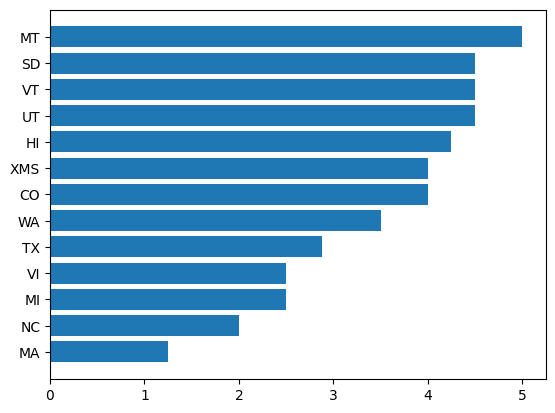

Average Stars:
 3.4907692307692306


In [27]:
# This bar chart is set as horizontal, using the lists of the states as labels, and the star values as the result. 
  # This shows a good display of how the businesses perform in each region. 


plt.barh(list(state_list), list(stars_list))
plt.show()

# Average stars is slightly lower than with the normal result. This one is 3.49 stars on average. 

print('Average Stars:\n', 
      statistics.mean(list(stars_list))
)

# This is due to there being a wide range of skewed values. 
  # All in all, this data cleansing step might even not be necessary, as it does not alter the result so much.

# Transformation of Dataset - Other Summary Variables:

Must get: 
- Average Stars 
- Average Reviews

In [28]:
# Other variables such as average results can be gained. However, there is little to extract in terms of information from these.

import statistics

average_stars_mean = statistics.mean(list(stars_list))
average_reviews_mean = statistics.mean(list(reviews_list))

print(
    'Average Results'
    '\nAverage Stars:', average_stars_mean,
    '\nAverage Reviews:', average_reviews_mean
    )

# Though this is not depicted here, the average stars has been calculated per state and based on obvious outliers.

# The minimum and maximum number of yelp reviews per state are PA - 1,540,790 reviews and MT - 6 reviews, respectively. However, not much insight besides outliers can be gained from this 
  # These have already been exploited as a result.

Average Results
Average Stars: 3.4907692307692306 
Average Reviews: 449700.5333333333


# Transformation of Dataset - Map Data:
There is latitude and longitude data. This may be used to present data. 

NOTE, THIS SECTION USES PANDAS. THERE WERE ATTEMPTS TO USE IT IN PYSPARK, BUT THIS FAILED. 

In [29]:
# As taught previously, the use of folium is a worth-while map for geospatial data, as working by longitude and latitude. 

!conda install -c conda-forge folium=0.5.0 --yes
import folium

/bin/bash: conda: command not found


In [30]:
# This world map must be loaded in first before it is used. This has been made as blank as possible. 
world_map = folium.Map(location=[0, 0], zoom_start=0)

In [31]:
# df_part_3, which displays longitude, latitude, the name of the business and its stars.

df_part_3 = df.select("longitude", "latitude", "name", "stars")
df_part_3.show()

# Regrettably, it was not understood how to use pyspark to insert these results. This has been inserted into pandas to compensate, as a final step in the transformation.

import pandas as pd

# Part 4 has been made, so to not alter part 3. 
df_part_4 = df_part_3.toPandas()

# This will be used to add the markers to the map.
reviews = folium.map.FeatureGroup()

+--------------+-------------+--------------------+-----+
|     longitude|     latitude|                name|stars|
+--------------+-------------+--------------------+-----+
|  -119.7111968|   34.4266787|Abby Rappoport, L...|  5.0|
|    -90.335695|    38.551126|       The UPS Store|  3.0|
|   -110.880452|    32.223236|              Target|  3.5|
|   -75.1555641|   39.9555052|  St Honore Pastries|  4.0|
|   -75.4716585|   40.3381827|Perkiomen Valley ...|  4.5|
|    -87.058943|    36.269593|      Sonic Drive-In|  2.0|
|    -90.340465|    38.627695|     Famous Footwear|  2.5|
|    -82.732983|     27.76659|      Temple Beth-El|  3.5|
|   -90.3210868|   38.5651648|Tsevi's Pub And G...|  3.0|
|   -86.7681696|   36.2081024|      Sonic Drive-In|  1.5|
|-82.4573802199|28.1904587953|           Marshalls|  3.5|
|   -82.4563199|   27.9552692|Vietnamese Food T...|  4.0|
| -86.127217412|39.6371332838|             Denny's|  2.5|
|    -82.787412|    27.966235|        Adams Dental|  5.0|
|   -82.760460

In [32]:
# In the interest of developing a more methodical approach, this could have been made to take a random seed. However, this did not work. Instead, a limit was set on the dataframe taken from part 3.
df_part_4 = df_part_4.iloc[0:500, :] 

In [33]:
# This will also be used to create a cluster for markers in the map. 

from folium import plugins
reviews = plugins.MarkerCluster().add_to(world_map)

In [34]:
# Latitude, longitude and label are each taken from the df_part_4, and are inserted into the map.

for lat, lng, label in zip(df_part_4.latitude, df_part_4.longitude, df_part_4.stars):
    reviews.add_child(
        folium.features.Marker(
            [lat, lng],
            popup=label,
            radius=5, # define how big you want the circle markers to be
            color='orange',
            fill=True,
            fill_color='white',
            fill_opacity=0.6
        )
    )

# add incidents to map
world_map.add_child(reviews)

This code did not work:
```
for row in df_part_4.rdd.collect():
    # Extract the longitude and latitude values
    latitude = float(row["latitude"])
    longitude = float(row["longitude"])
    
reviews = folium.map.FeatureGroup()

reviews.add_child(
        folium.features.Marker(
            [latitude, longitude],
            radius=10,
            color='orange',
            fill=True,
            fill_color='white',
            fill_opacity=0.6
        )
    )
```

# Final Insights:

From the transformation, one might come to the following conclusions...

Yelp is a method of business feedback, while also acting as a technique for the customer to assess the business. 
Traditionally, a higher review indicates a higher success in the business.

However, in order for a business to be rated well, another business must be rated poorly. Therefore, the averages are not likely to change more than marginally.

This is shown well within the bar charts, whose averages did not differ more than 0.1 star (by percentage, 2%), between 287 reviews across multiple states, and millions across the rest. 

The total reviews are able to show, relatively, where Yelp is active and where it is not. In locations such as Texas or Montana, there are few Yelp reviews.
This does not mean that these states have no review system, but that Yelp may have competition in these locations. As a result, this data may be useful to further develop Yelp's business model. 

The map also has the capacity to create an interactive display. However, this was not fully taken advantage of. 